# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:60px 0; border: double; font-size:100px">Natural Language Processing</div>

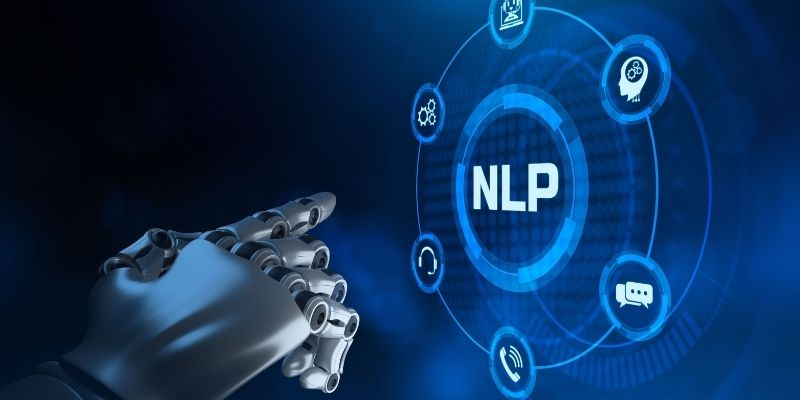

---

# <div style="background-color:lightsteelblue; text-align:center; color:black; vertical-align: middle; padding:40px 0; border: double; font-size:50px">Project Summary:</div>

## We acquired 100 READMEs from [Github's Most Starred Repos](https://github.com/search?l=%3Fspoken_language_code%3Den&p=11&q=stars%3A%3E10000&ref=advsearch&type=Repositories) (10/17/22), encoded and decoded the text, and created n-grams to predict the programming language used within the repo.

## Baseline prediction, predicting Javascript, was 25%. Our best model predicted the programming language at 60%.

---

# Imports:

In [1]:
# Imports everything from functions.py, including all libraries functions.py uses.
from functions import *

# Questions:
    - What are the most common words in READMEs?
    - Does the length of the README vary by programming language?
    - Do different programming languages use a different number of unique words?
    - Are there any words that uniquely identify a programming language?
    
# Hypothesis'
    - ReadME's that fall under the 'resources' type will be longer than other programming languages
    - There will be specific terms found only in specific language, such as references to the language, and to libraries or functions within it.

---

# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Acquisition:</div>

Data was aquired using the acquire.py we were supplied, we fed it the top 100 starred GitHub repositories from Monday, Oct 17, 2022. then saved the data.json as a .csv for future reference.
- This notebook works off the assumption that you downloaded the json_data.csv from the GitHub.
> One entry also loaded a readme from another source, so we had it replace the hyperlink to that data with the proper readme data it was referencing.

In [2]:
# Take a look at the full table
df = pd.read_csv('json_data.csv', index_col=[0])
df

repo    language  \
0                freeCodeCamp/freeCodeCamp  TypeScript   
1                           996icu/996.ICU   resources   
2   EbookFoundation/free-programming-books   resources   
3      jwasham/coding-interview-university   resources   
4                     sindresorhus/awesome   resources   
..                                     ...         ...   
95                  ripienaar/free-for-dev        HTML   
96                               atom/atom  JavaScript   
97                         pytorch/pytorch         C++   
98                      angular/angular.js  JavaScript   
99                           reduxjs/redux  TypeScript   

                                      readme_contents  length  \
0   [![freeCodeCamp Social Banner](https://s3.amaz...   21411   
1   [996.ICU](https://996.icu/#/en_US)\n=======\n*...    7262   
2   # List of Free Learning Resources In Many Lang...   14388   
3   # Coding Interview University\n\n> I originall...  134890   
4   <div align="center">\n\t<a href="https://vshym...   74878   
..                                                ...     ...   
95  # free-for.dev\n\nDevelopers and Open Source a...  223396   
96  # Atom\n\n[![Build status](https://dev.azure.c...    4454   
97  ![PyTorch Logo](https://github.com/pytorch/pyt...   22336   
98  Using AngularJS with the Closure Compiler\n===...     927   
99  # <a href='https://redux.js.org'><img src='htt...   17366   

                                                clean  word_count  \
0   ['freecodecamp', 'social', 'pull', 'request', ...         668   
1   ['please', 'note', 'exists', 'official', 'acco...         444   
2   ['list', 'free', 'learning', 'resource', 'many...         365   
3   ['coding', 'interview', 'university', 'origina...        6509   
4   ['div', 'aligncenter', 'img', 'width500', 'hei...        2855   
..                                                ...         ...   
95  ['freefordev', 'developer', 'open', 'source', ...       17922   
96  ['atom', 'build', 'atom', 'repository', 'atom'...         254   
97  ['pytorch', 'pytorch', 'python', 'package', 'p...        1530   
98  ['using', 'angularjs', 'closure', 'compiler', ...          77   
99  ['height60', 'altredux', 'logo', 'redux', 'pre...         965   

                                                words  
0   freecodecamp social pull request open source s...  
1   please note exists official account app mercha...  
2   list free learning resource many language div ...  
3   coding interview university originally created...  
4   div aligncenter img width500 height350 altawes...  
..                                                ...  
95  freefordev developer open source author massiv...  
96  atom build atom repository atom archived decem...  
97  pytorch pytorch python package provides two hi...  
98  using angularjs closure compiler closure compi...  
99  height60 altredux logo redux predictable state...  

[100 rows x 7 columns]

In [3]:
# Check the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             100 non-null    object
 1   language         100 non-null    object
 2   readme_contents  100 non-null    object
 3   length           100 non-null    int64 
 4   clean            100 non-null    object
 5   word_count       100 non-null    int64 
 6   words            100 non-null    object
dtypes: int64(2), object(5)
memory usage: 6.2+ KB


In [4]:
# All languages used. "Resources" was input for all without a language
df.language.value_counts()

JavaScript    25
resources     17
TypeScript    12
Python        11
C++            7
Go             7
Shell          4
Java           4
C              3
Rust           2
Vim Script     1
Clojure        1
PHP            1
Markdown       1
Vue            1
C#             1
Dart           1
HTML           1
Name: language, dtype: int64

---

# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Preparation:</div>

The Data was basic text cleaned by lowercasing, normalizing unicode (using NFKD, ascii, and utf-8), and having any item that isn't a letter, number, whitespace, or single quote removed. Then it was Tokenized, having spaces placed between any punctuation, before having any stopwords removed from it, including words over 15 letters long (which would eliminate a large portion of the hyperlinks.)

# Distribution before split:

In [5]:
# See distribution of repo lengths and word counts
#count(df)

### combine with acquisition?

---

# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Exploration and Pre-Processing:</div>

For Explore, we compared the most common words and bi-grams for each language to each other and the most common overall.

# Split: Train, Test

In [6]:
X_train, X_test, y_train, y_test = split(df)
df_train = pd.DataFrame(X_train)
train = df_train.merge(y_train, on= df_train.index)


In [7]:
train.head()

key_0                                              words    language
0     66  scrcpy v124 img width128 height128 altscrcpy a...           C
1     63  rust programming language main source code rep...        Rust
2     94  flask flask lightweight wsgi_ web application ...      Python
3     96  atom build atom repository atom archived decem...  JavaScript
4     57  line need empty line c kramdown isnt smart dea...        Java

### charts, graphs, word frequency

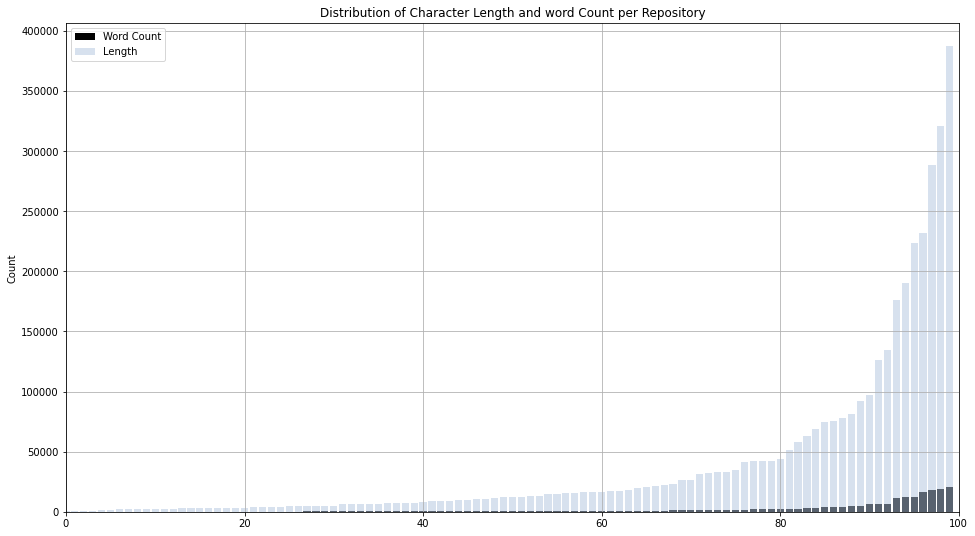

In [8]:
train_count(df, train)

### Word Use Charts:

Normal Word Use by Language:


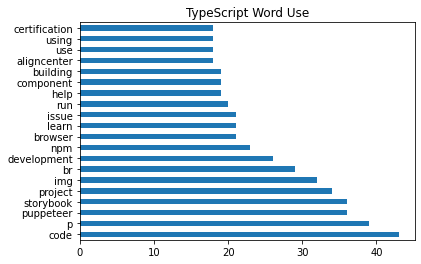

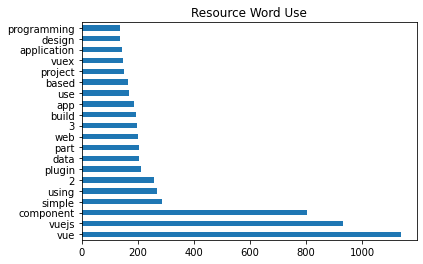

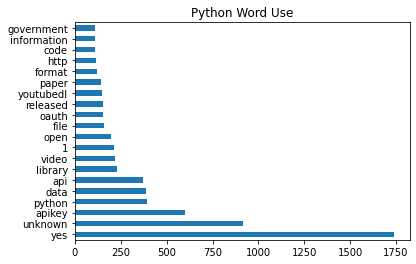

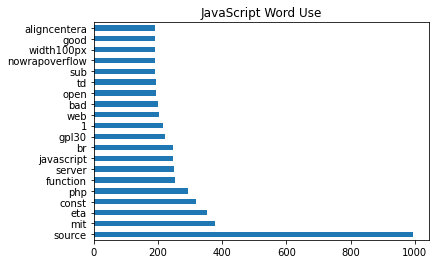

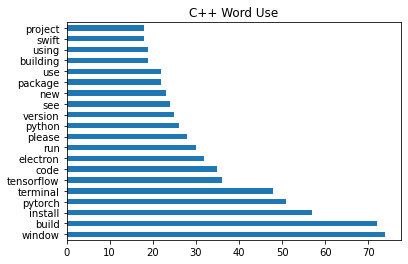

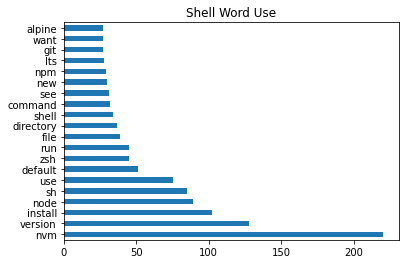

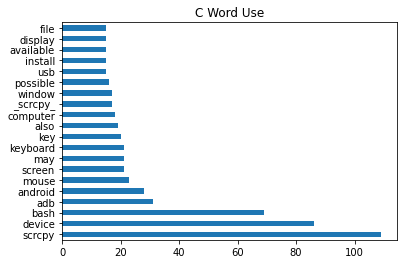

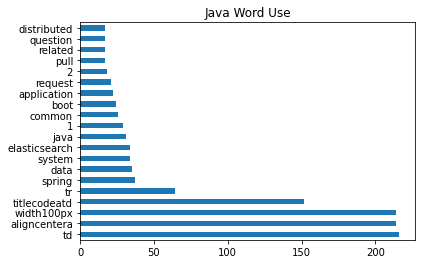

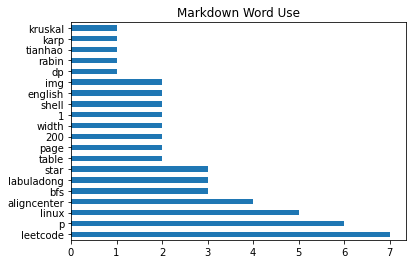

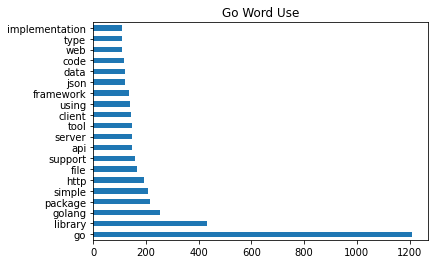

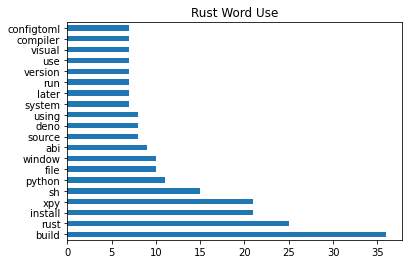

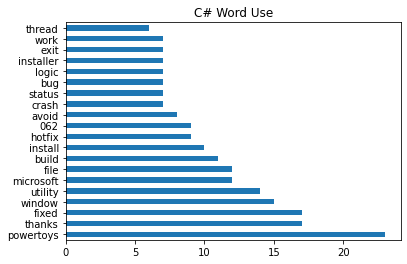

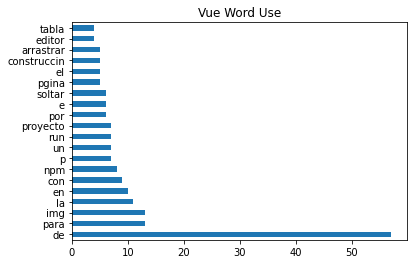

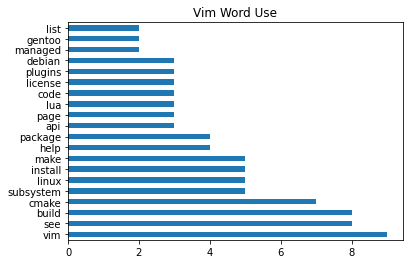

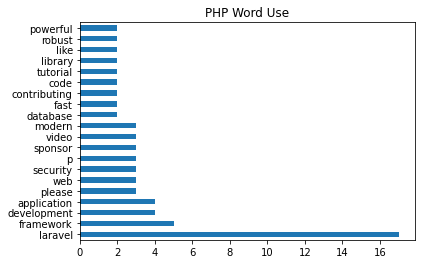

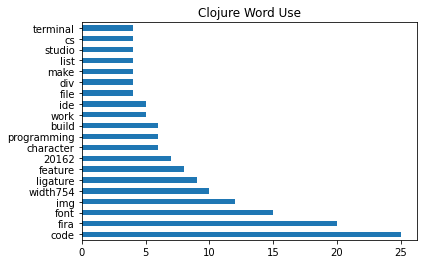

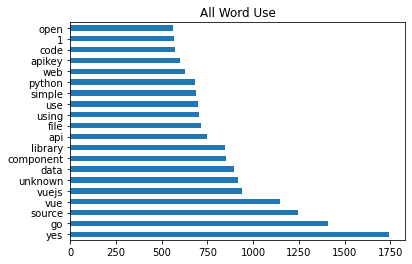

 
Bigram Word Use by Language


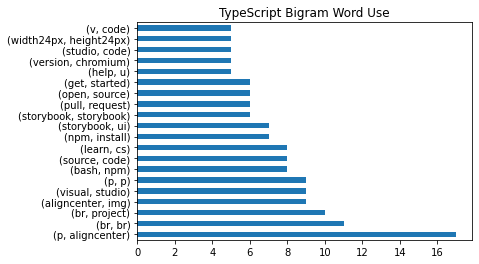

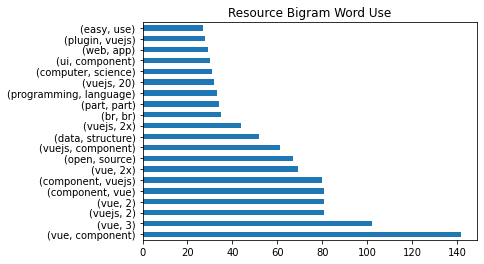

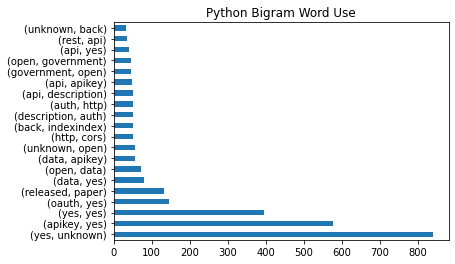

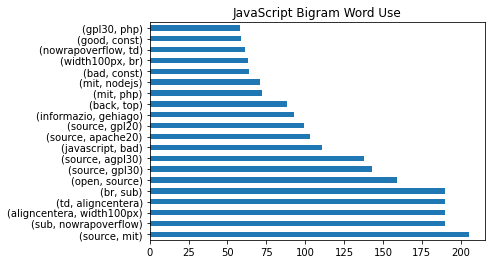

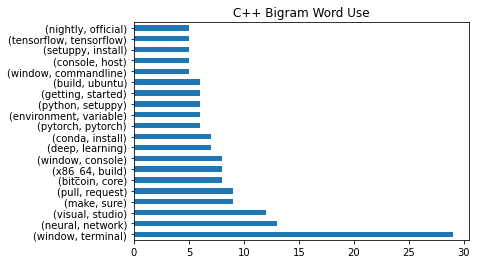

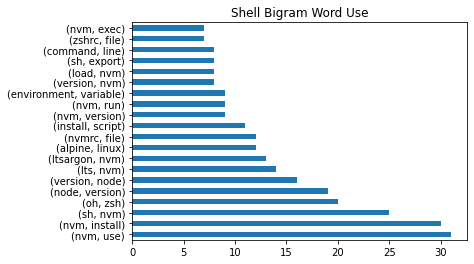

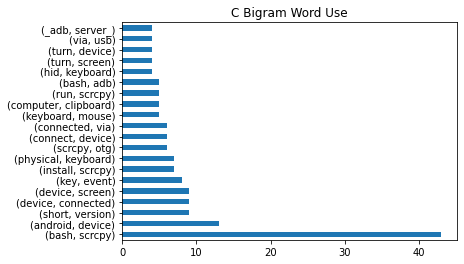

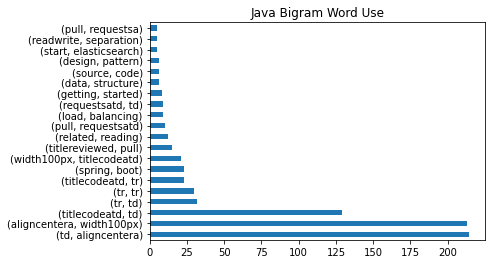

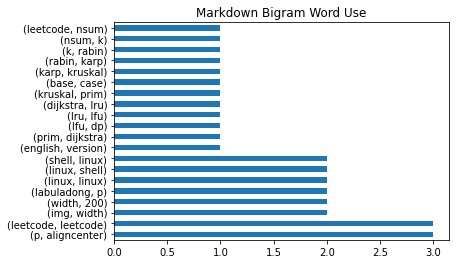

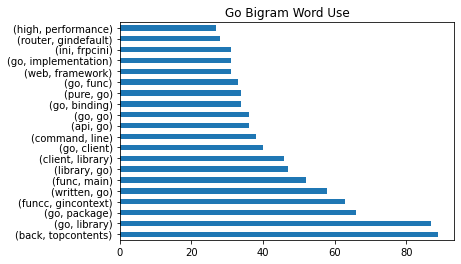

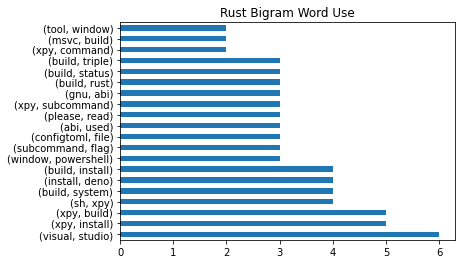

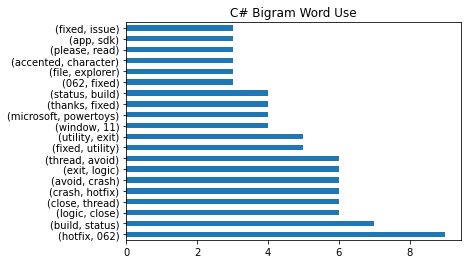

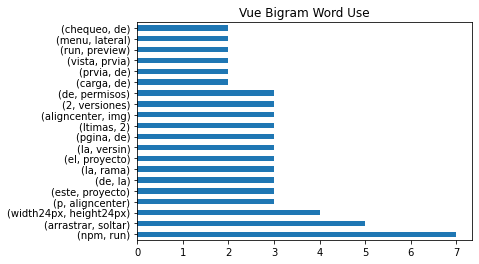

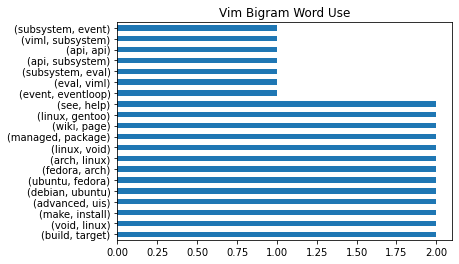

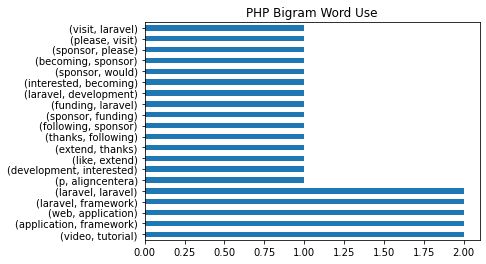

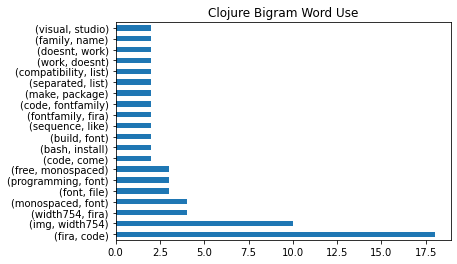

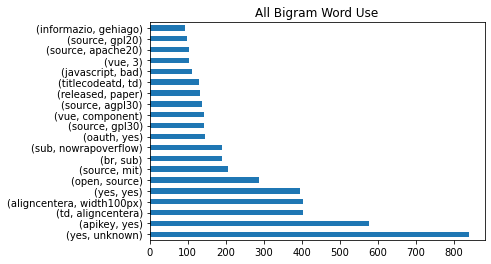

In [9]:
bigram_charts(train)

### Word Cloud Images

Word Clouds of Most Used Word by Language


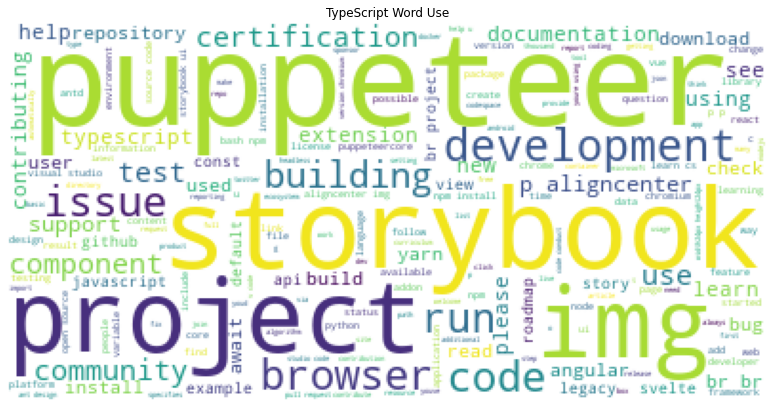

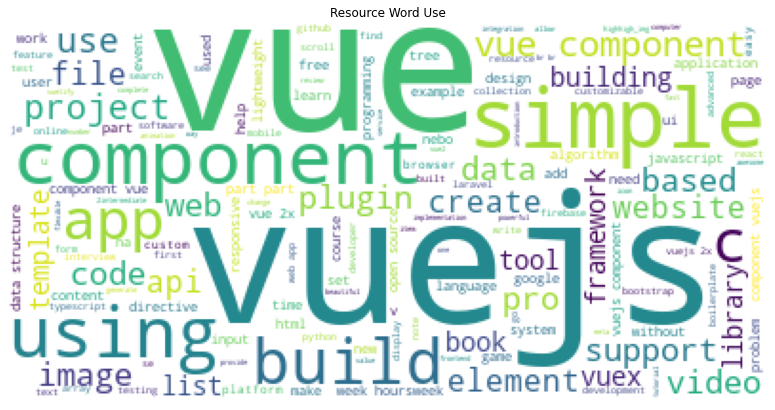

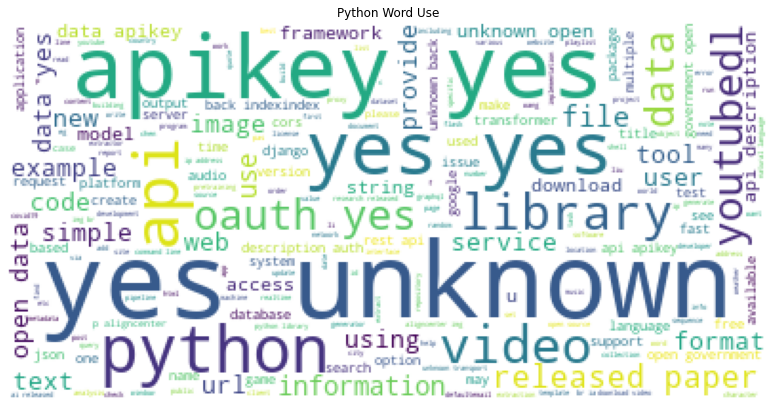

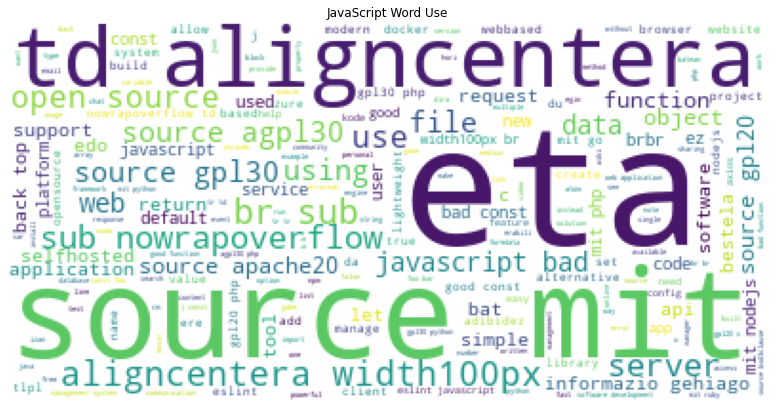

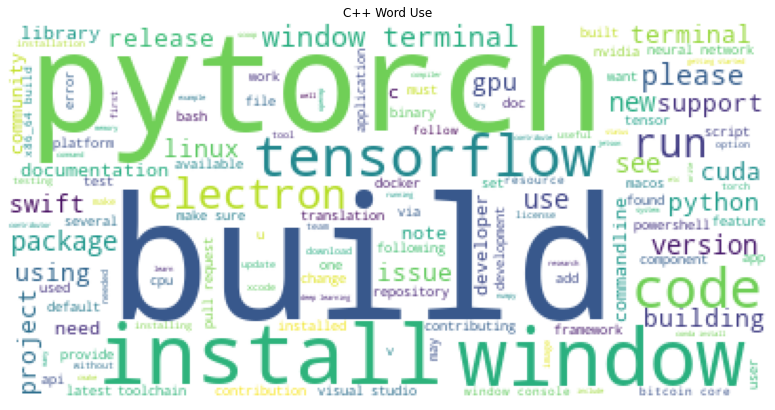

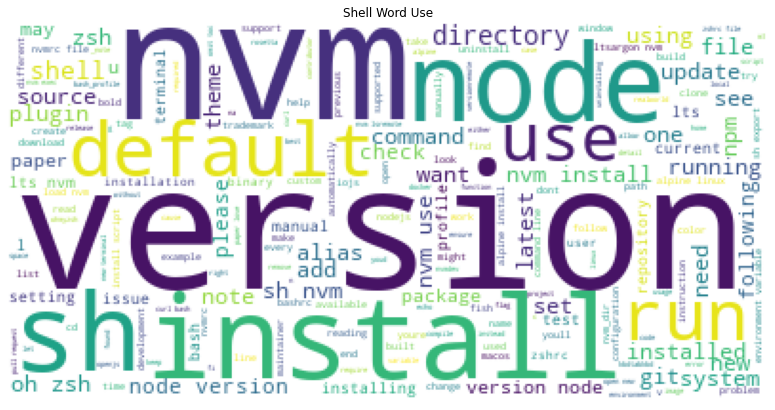

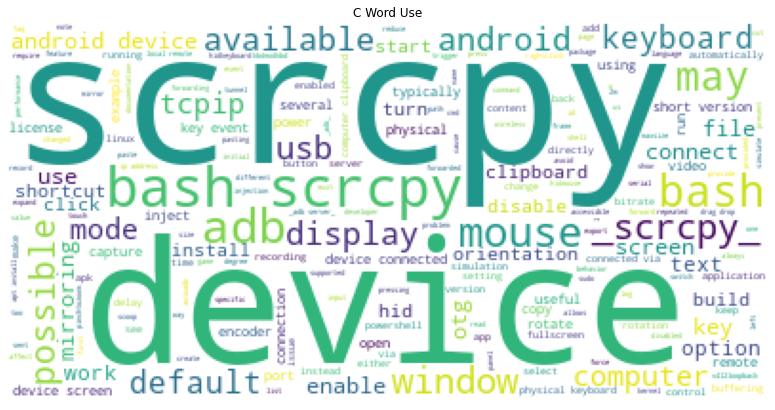

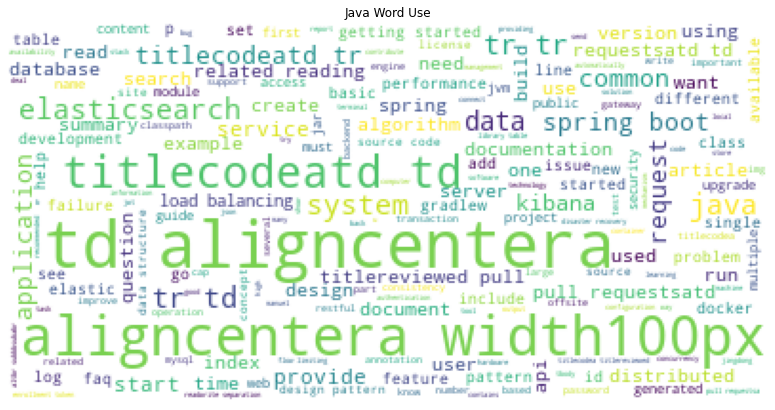

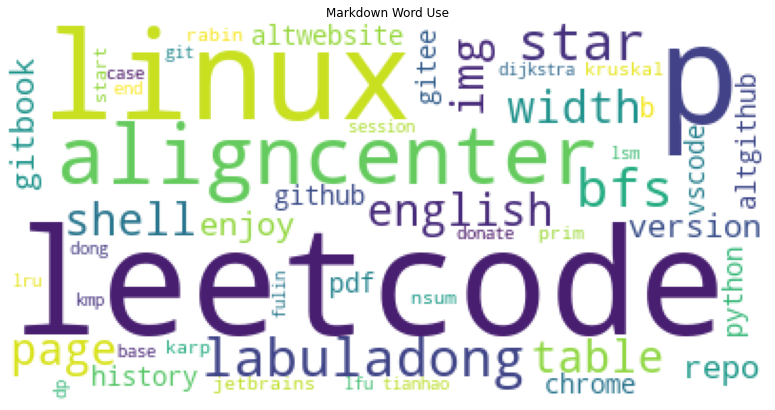

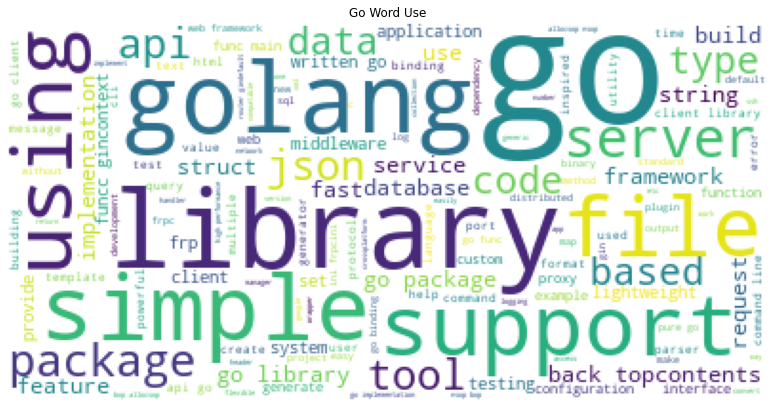

AttributeError: module 'pandas' has no attribute 'Seriess'

<Figure size 1008x504 with 0 Axes>

In [10]:
wordcloud_img(train)

---

# <div style="background-color:lightsteelblue; color:black; text-align:center; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Modeling:</div>

### models and performance

In [ ]:
df.head()

repo    language  \
0               freeCodeCamp/freeCodeCamp  TypeScript   
1                          996icu/996.ICU   resources   
2  EbookFoundation/free-programming-books   resources   
3     jwasham/coding-interview-university   resources   
4                    sindresorhus/awesome   resources   

                                     readme_contents  length  \
0  [![freeCodeCamp Social Banner](https://s3.amaz...   21411   
1  [996.ICU](https://996.icu/#/en_US)\n=======\n*...    7262   
2  # List of Free Learning Resources In Many Lang...   14388   
3  # Coding Interview University\n\n> I originall...  134890   
4  <div align="center">\n\t<a href="https://vshym...   74878   

                                               clean  word_count  \
0  ['freecodecamp', 'social', 'pull', 'request', ...         668   
1  ['please', 'note', 'exists', 'official', 'acco...         444   
2  ['list', 'free', 'learning', 'resource', 'many...         365   
3  ['coding', 'interview', 'university', 'origina...        6509   
4  ['div', 'aligncenter', 'img', 'width500', 'hei...        2855   

                                               words  
0  freecodecamp social pull request open source s...  
1  please note exists official account app mercha...  
2  list free learning resource many language div ...  
3  coding interview university originally created...  
4  div aligncenter img width500 height350 altawes...

In [ ]:
X = df.words
y = df.language
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=536)

In [ ]:
cv = CountVectorizer()

In [ ]:
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=3)

In [ ]:
tree.fit(X_bow, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
tree.score(X_bow, y_train)

0.4625

In [ ]:
X_test_bow = cv.transform(X_test)
tree.score(X_test_bow, y_test)

0.65

In [ ]:
pd.Series(
    dict(
    zip(cv.get_feature_names_out(), 
    tree.feature_importances_))).sort_values().tail()

click      0.117487
meetups    0.148735
object     0.151328
book       0.209481
python     0.236744
dtype: float64

In [ ]:
X_train

66    scrcpy v124 img width128 height128 altscrcpy a...
63    rust programming language main source code rep...
94    flask flask lightweight wsgi_ web application ...
96    atom build atom repository atom archived decem...
57    line need empty line c kramdown isnt smart dea...
                            ...                        
27    build youtubedl download video youtubecom vide...
34    30 second code short javascript code snippet d...
85    p aligncenter img altrevealjs width500 brbr al...
46    typescript github action devops build npm lang...
28    readmeelmd readmejamd readmekomd romnreadmerom...
Name: words, Length: 80, dtype: object

---

# <div style="background-color:salmon; text-align:center; color:black; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Findings:</div>

## Baseline Accuracy: 25% (Predicting Javascript as the most occurring)
### The "resources" type repo have the longest lengths and words combined, however

## 1. M

## 2. M

## 3. M

## The best model " " performed at 60%

---

# <div style="background-color:salmon; text-align:center; color:black; vertical-align: middle; padding:40px 0;font-size:50px; border: double">Recommendations/Next Steps:</div>

# Recommendations:

## 1. M

## 2. M

## 3. M

# Next Steps:
### - Narrow down repositiory languages 

---